# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [36]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [8]:
df = pd.read_csv("../data/qcl_stylo_data_drama.csv") 
df['target'] = df['Text Name'].apply(lambda x: x.split()[0])
df.head()

,Personal Pronouns,Demonstrative Pronouns,quidam,Third-Person Pronouns,iste,alius,ipse,idem,priusquam,antequam,quominus,dum,quin,ut,Conditionals,Interrogative Sentences,Superlatives,atque + Consonant,Relative Clauses,Mean Length Relative Clauses,Gerunds and Gerundives,cum,Conjunctions,Vocatives,Mean Sentence Length,Characters,Words,Text Name,Sentences,target
0,0.01380,0.00915,0.00004,0.00091,0.00036,0.00036,0.00019,0.00036,0.00006,0.0,0.00000,0.00023,0.00045,0.00284,0.00223,0.00543,0.00006,0.00004,0.25034,24.85957,0.00025,0.00025,0.01144,0.00000,48.07959,"47,118","9,332",Plautus Amphitruo,980,Plautus
1,0.01431,0.00793,0.00000,0.00093,0.00062,0.00049,0.00044,0.00034,0.00010,0.0,0.00000,0.00029,0.00060,0.00257,0.00306,0.00560,0.00018,0.00008,0.22661,21.48205,0.00036,0.00039,0.00954,0.00010,43.14206,"38,569","7,629",Plautus Asinaria,894,Plautus
2,0.01617,0.00896,0.00000,0.00068,0.00040,0.00028,0.00012,0.00018,0.00012,0.0,0.00000,0.00012,0.00055,0.00262,0.00256,0.00523,0.00015,0.00009,0.23211,24.54268,0.00018,0.00025,0.01105,0.00009,43.94452,"32,475","6,537",Plautus Aulularia,739,Plautus
3,0.01368,0.01016,0.00002,0.00071,0.00029,0.00027,0.00021,0.00025,0.00010,0.0,0.00000,0.00033,0.00031,0.00292,0.00200,0.00644,0.00013,0.00013,0.20882,23.68919,0.00017,0.00042,0.00995,0.00023,41.08655,"47,948","9,443",Plautus Bacchides,1167,Plautus
4,0.01527,0.01055,0.00000,0.00087,0.00058,0.00048,0.00031,0.00019,0.00005,0.0,0.00002,0.00019,0.00036,0.00253,0.00248,0.00409,0.00017,0.00014,0.26708,23.42241,0.00034,0.00031,0.01250,0.00000,51.20838,"41,530","8,297",Plautus Captivi,811,Plautus


In [11]:
features = ['Personal Pronouns', 'Demonstrative Pronouns', 'quidam',
       'Third-Person Pronouns', 'iste', 'alius', 'ipse', 'idem', 'priusquam',
       'antequam', 'quominus', 'dum', 'quin', 'ut', 'Conditionals',
       'Interrogative Sentences', 'Superlatives', 'atque + Consonant',
       'Relative Clauses', 'Mean Length Relative Clauses',
       'Gerunds and Gerundives', 'cum', 'Conjunctions', 'Vocatives',
       'Mean Sentence Length']

In [18]:
# Separate features from target

x = df.loc[:, features].values
y = df.loc[:, ['target']].values

In [19]:
# Scale features

x = StandardScaler().fit_transform(x)

In [29]:
# SCIKIT PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(x)

pcs_df = pd.DataFrame(data=pcs, columns=['pc1','pc2'])

# VISUALIZE

In [30]:
pcs_df = pd.concat([df['target'], pcs_df], axis=1)

In [32]:
pcs_df.head()

,target,pc1,pc2
0,Plautus,-0.992357,-0.956676
1,Plautus,-2.186423,-0.257579
2,Plautus,-1.314321,-2.007904
3,Plautus,-1.218159,-0.683761
4,Plautus,-0.816335,-1.510894


Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'Principal Component Analysis (n=2)')

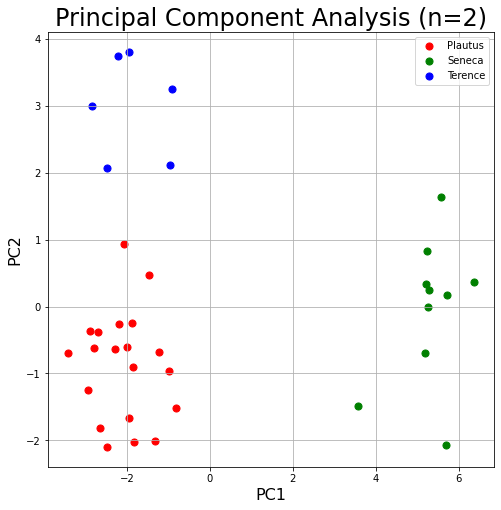

In [38]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize=16)
ax.set_ylabel('PC2', fontsize=16)
ax.set_title('Principal Component Analysis (n=2)', fontsize=24)

targets = ['Plautus', 'Seneca', 'Terence']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = pcs_df['target'] == target
    ax.scatter(pcs_df.loc[indicesToKeep, 'pc1'],
               pcs_df.loc[indicesToKeep, 'pc2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()